## Gerekli kütüphanelerin eklenmesi
Selamlar Arkadaşlar. 
Bu gördüğünüz 3 kütüphane makine öğrenmesi eğitimlerinde sürekli olarak kullanacağımız 3 Kütüphane. 

Pandas -> Verilerin aktarılması,işlenmesi, bazende görselleştirilmesi için kullanılır.

Numpy -> Matrisler üzerinde işlem yapmak için kullanılır.

Matplotlib -> Veri görselleştirme için kullanılır.

In [1]:
import pandas as pd #Pandas kütüphanesi pd olarak içe aktarıldı
import numpy as np #Numpy kütüphanesi np olarak içe aktarıldı
import matplotlib.pyplot as plt #Matplotlib kütüphanesi plt olarak içeri aktarıldı

### Verinin içe aktarılması ve görselleştirilmesi

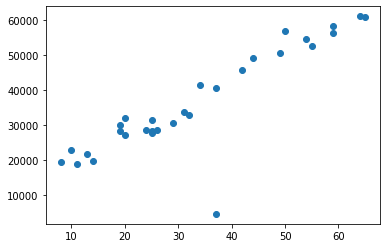

In [2]:
veri = pd.read_csv("../input/gazi-ai-basit-lroklu-lr/Basit_LR.csv")
#Veriyi Pandas kütüphanesindeki read_csv fonksiyonu ile içeri aktardık.

X = veri[["Aylar"]] #Bağımsız değişkenimizi oluşturduk
Y = veri[["Satislar"]] #Bağımlı değişkenimizi oluşturduk

plt.scatter(X,Y) #Bağımlı ve bağımsız değişken arasındaki saçılım grafiğini yazdırdık 
#ilk parametre x eksenini, 2.parametre y eksenini gösterir.

### Veri setinin eğitim ve test olarak ayrılması
Derstede bahsettiğimiz üzere, Makineyi eğitmek için train
başarı oranını test etmek için ise test veri kümesini kullanıyoruz. Bunun için veriyi %30 test, %70 train olacak şekilde bölelim. 

In [3]:
from sklearn.model_selection import train_test_split
#train_test_split modülünü içeri aktardık
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,
                                             test_size = 0.3,
                                            random_state = 0)
#1.parametre xtrain ve xtest neyden bölünecek
#2.parametre ytrain ve ytest neyden bölünecek
#3.parametre verinin kaçta kaçı teste ayrılacak (0.3 = %30) 
#4.parametre verinin hangi dağılıma göre dağılacağı (herhangi bir sayı koyabilirsiniz)

### Modelleme
Verilerimiz hazır, Artık makineyi eğitme kısmına geldik. 
Lineer regresyonu sklearn.linear_model içerisinden LinearRegression ile içeri aktardık ve bu sınıftan bir Lr elemanı oluşturduk.

In [4]:
#sklearn kütüphanesindeki linear_model modülünden LinearRegression sınıfını içe aktardık
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()#Nesne oluşturma 
Lr.fit(xtrain,ytrain) #Makineyi eğitme adımı.
#Makinenin xtrainden ytraini öğrenmesini sağladık 
tahmin = Lr.predict(xtest)
#xtrainden ytraini öğrenen makinemizden xtesti tahmin edelim.

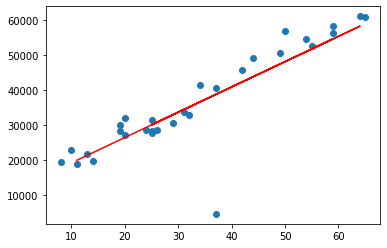

In [5]:
plt.scatter(X,Y) #X ve Y yi yine saçılım grafiğiyle gösterelim
plt.plot(xtest,tahmin,color = "red") #oluşturduğumuz tahmin modelini kırmızı renk ile veri üzerinde gösterdik.
#Verimizin Saçılım grafiğini çizdirdik.
#Şimdide yaptığımız tahminin veri üzerindeki halini görelim.


Görüldüğü üzere makinemiz veriden aldığı bilgiler ile Lineer regresyon işlemini tamamladı.

### Çoklu lineer regresyon.
Çoklu lineer regresyon basit lineer regresyondan farklı olarak tek bir bağımsız değişken barındırmaz.
Birden fazla bağımsız değişken barındıran lineer regresyona çoklu lineer regresyon denir.

#### Verinin okunması

In [6]:
data = pd.read_csv("../input/gazi-ai-basit-lroklu-lr/oklu_LR.csv")
data.info() #Bu fonksiyon veri hakkındaki bilgileri verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ulke      22 non-null     object
 1   boy       22 non-null     int64 
 2   kilo      22 non-null     int64 
 3   yas       22 non-null     int64 
 4   cinsiyet  22 non-null     object
dtypes: int64(3), object(2)
memory usage: 1008.0+ bytes


In [7]:
Y = data[["yas"]] #bağımlı değişkenimiz olan yaşı Y değişkenine atadık
Y
data

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [8]:
data.ulke = (data.ulke == "tr").astype(int)
data
data.cinsiyet = (data.cinsiyet == "k").astype(int)
data
#Buradaki işlemde ise kategorik olan ülke ve cinsiyet verilerini sayısal veri tipine
#dönüştürdük bunun için ülke Türkiye ise veriyi TRUE ve FALSE olarak çevirdikten sonra bunu bool tipinden integera dönüştürdük.
#aynı işlemi cinsiyet içinde yaptık artık cinsiyet ve ülke verileri kategorik değil sayısal

,ulke,boy,kilo,yas,cinsiyet
0,1,130,30,10,0
1,1,125,36,11,0
2,1,135,34,10,1
3,1,133,30,9,1
4,1,129,38,12,0
5,1,180,90,30,0
6,1,190,80,25,0
7,1,175,90,35,0
8,1,177,60,22,1
9,0,185,105,33,0


In [9]:
data.corr()
#derste bahsetmiş olduğumuz ve slaytta da bulunan korelasyon matrisini oluşturalım
X = data.drop(["yas"],axis=1) #yukarıda bağımlı değişkenimiz olan yaşı atamıştık şimdi genel veri'den yaş verisini çıkararak bağımsız değişkenlerimizi elde edelim
X

,ulke,boy,kilo,cinsiyet
0,1,130,30,0
1,1,125,36,0
2,1,135,34,1
3,1,133,30,1
4,1,129,38,0
5,1,180,90,0
6,1,190,80,0
7,1,175,90,0
8,1,177,60,1
9,0,185,105,0


In [10]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.3 , random_state = 42)
Lr.fit(xtrain,ytrain)
tahmin = Lr.predict(xtest)
tahmin
#tahmin işlemi için herhangi bir şekilde basit lineer regresyondan farklı bir kod kullanılmaz.
#not defterine okuduğunuz için çok teşekkür ederim Salı günü eğitimde görüşmek üzere :)
#Mert Aydoğan










array([[-0.11748626],
       [38.47705759],
       [31.19328829],
       [ 3.05896505],
       [23.71338912],
       [26.11002017],
       [41.74918526]])